**In this notebook we will explore the data science field  salaries in detail..**


 **We will see how experience level,location,year and attributes affect the salary...**

 **We will see how experience level,location,year and attributes affect no of jobs in this field...**

**We will explore the data with different features and at last we will check the correlation**

**Read it completely and if you find any mistake then feel free to guide me**

# Importing Modules

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


/kaggle/input/data-science-salaries-2023/ds_salaries.csv


In [2]:
df=pd.read_csv('ds_salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [3]:
#removing unneccssary columns
df.drop(['salary','salary_currency'],axis=1,inplace=True)

# Descriptive Analysis

In [4]:
def des_anal(dataframe):
    print("----------------------------Shape----------------------------------")
    print(f'{df.shape}\n\n')
    print("----------------------------Columns----------------------------------")
    print(f'{df.columns}\n\n')
    print("----------------------------Info----------------------------------")
    print(f'{df.info()}\n\n')
    print("----------------------------Descriptive----------------------------------")
    print(f'{df.describe()}\n\n')
    print("----------------------------Null values----------------------------------")
    print(f'{df.isnull().sum()}\n\n')
    print("----------------------------Unique Values----------------------------------")
    print(f'{df.nunique()}\n\n')

In [5]:
des_anal(df)

----------------------------Shape----------------------------------
(3755, 9)


----------------------------Columns----------------------------------
Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')


----------------------------Info----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary_in_usd       3755 non-null   int64 
 5   employee_residence  3755 non-null   object
 6   remote_ratio        3755 non-null   int64 
 7   company_location    3755 non-null   ob

# EDA(Exploratory Data Analysis)

In [6]:
df['experience_level'].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

**here there are 4 unique values which are SE(Senior level/expert) , MI(medium level/intermediate) , EN (Entry level) and EX(Executive level)
lets rename the values**

In [7]:
df['experience_level']=df['experience_level'].replace('SE','Senior level')
df['experience_level']=df['experience_level'].replace('MI','intermediate level')
df['experience_level']=df['experience_level'].replace('EN','Entry level')
df['experience_level']=df['experience_level'].replace('EX','Executive level')

In [8]:
df['employment_type'].unique()

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

**It has 4 unique values which are FT(Full Time) , CT (Contract) ,FL (Freelance) and PT(part time) so lets convert them** 

In [9]:
df['employment_type']=df['employment_type'].replace('FT','Full Time')
df['employment_type']=df['employment_type'].replace('CT','Contract')
df['employment_type']=df['employment_type'].replace('FL','Freelance')
df['employment_type']=df['employment_type'].replace('PT','Part Time')

In [10]:
jobs=df['job_title'].value_counts()
jobs

Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64

**if we see above the most jobs equipped by professionals are Data Scientist,Data Engineer followed by data analyst and machine learning engineer**

In [11]:
top10_jobs=jobs[:15]
top10_jobs

Data Engineer                 1040
Data Scientist                 840
Data Analyst                   612
Machine Learning Engineer      289
Analytics Engineer             103
Data Architect                 101
Research Scientist              82
Data Science Manager            58
Applied Scientist               58
Research Engineer               37
ML Engineer                     34
Data Manager                    29
Machine Learning Scientist      26
Data Science Consultant         24
Data Analytics Manager          22
Name: job_title, dtype: int64

In [12]:
job_title=['Data Engineer','Data Scientist', 'Data Analyst','ML Engineer', 'Analytics Engineer','Data Architect','Research Scientist', 'DS Manager', 'Applied Scientist','Research Engineer', 'ML Enginer', 'Data Manager','ML Scientist','DS Consultant','DA Manager']
counts=np.array(top10_jobs)

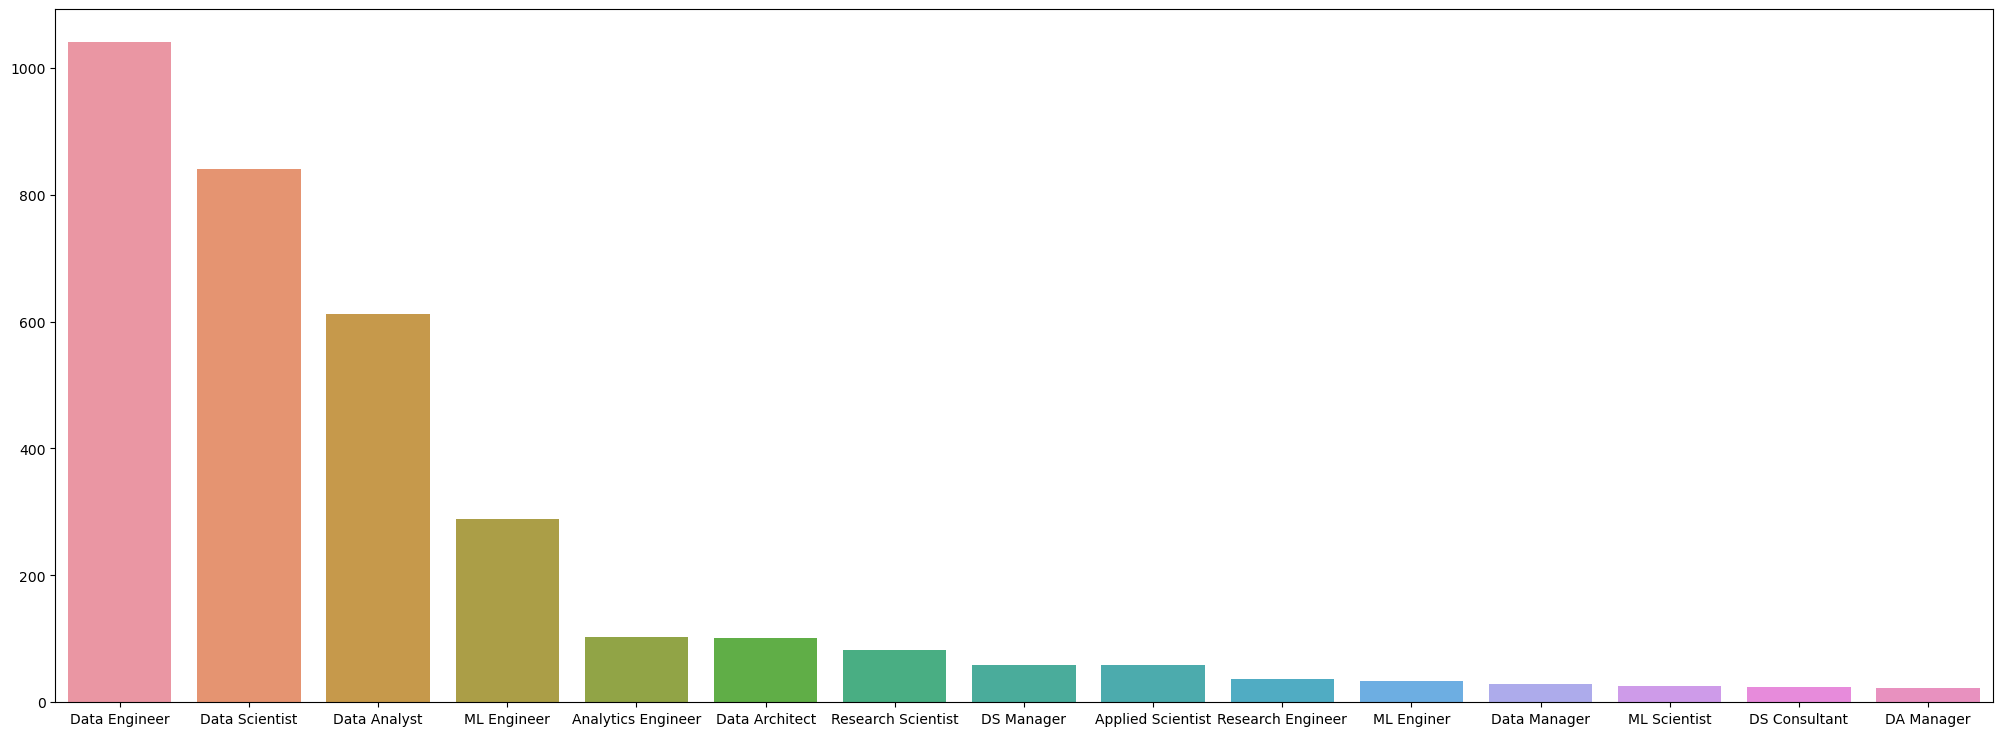

In [13]:
plt.figure(figsize=(25,9))
sns.barplot(x=job_title,y=counts)
plt.show()

# Salaries based on other features

### Salary based on job Title

In [14]:
df['salary_in_usd'].groupby(df['job_title']) .mean()

job_title
3D Computer Vision Researcher     21352.250000
AI Developer                     136666.090909
AI Programmer                     55000.000000
AI Scientist                     110120.875000
Analytics Engineer               152368.631068
                                     ...      
Research Engineer                163108.378378
Research Scientist               161214.195122
Software Data Engineer            62510.000000
Staff Data Analyst                15000.000000
Staff Data Scientist             105000.000000
Name: salary_in_usd, Length: 93, dtype: float64

**These are the jobs titles with their mean salaries in usd currency**

### Salaries based on Experiance level

In [15]:
exp_wise_salary=np.array(df['salary_in_usd'].groupby(df['experience_level']) .mean())

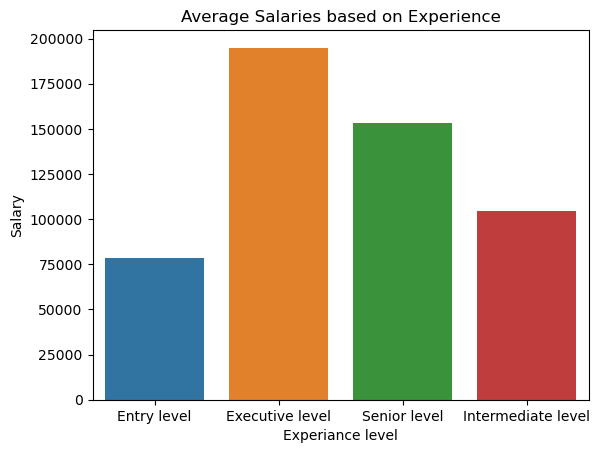

In [16]:
plt.title("Average Salaries based on Experience")
plt.xlabel('Experiance level')
plt.ylabel('Salary')
sns.barplot(x=['Entry level', 'Executive level', 'Senior level', 'Intermediate level'],y=exp_wise_salary)
plt.show()

**If we see above the of executive level experience in maximum as compared to others**

### Salaries based on Employment Type

In [17]:
df['salary_in_usd'].groupby(df['employment_type']) .mean()

employment_type
Contract     113446.900000
Freelance     51807.800000
Full Time    138314.199570
Part Time     39533.705882
Name: salary_in_usd, dtype: float64

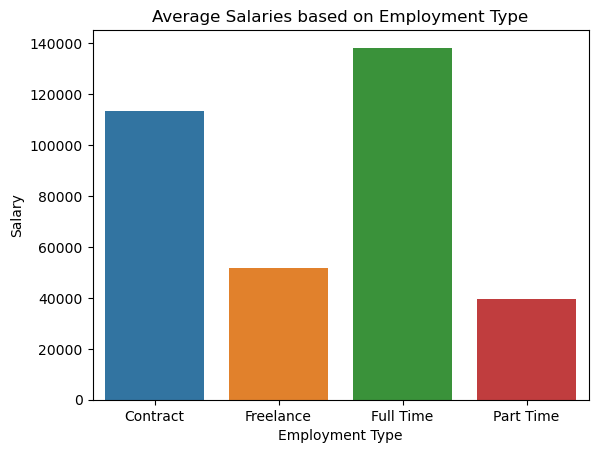

In [18]:
employ_wise_salary=np.array(df['salary_in_usd'].groupby(df['employment_type']) .mean())
plt.title("Average Salaries based on Employment Type")
plt.xlabel('Employment Type')
plt.ylabel('Salary')
sns.barplot(x=['Contract', 'Freelance', 'Full Time', 'Part Time'],y=employ_wise_salary)
plt.show()

**full time employees get more average salaries than other employee type**

### Salaries based on Remote ratio

In [19]:
df['salary_in_usd'].groupby(df['remote_ratio']) .mean()


remote_ratio
0      144316.202288
50      78400.687831
100    136481.452830
Name: salary_in_usd, dtype: float64

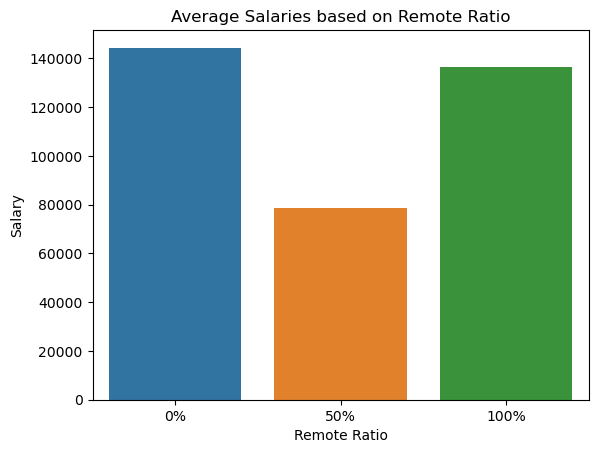

In [20]:
remote_wise_salary=np.array(df['salary_in_usd'].groupby(df['remote_ratio']) .mean())
plt.title("Average Salaries based on Remote Ratio")
plt.xlabel('Remote Ratio')
plt.ylabel('Salary')
sns.barplot(x=['0%', '50%', '100%'],y=remote_wise_salary)
plt.show()

**0% remote employees get better salaries than other employees**

### Salaries based on Company Location

In [21]:
df['salary_in_usd'].groupby(df['company_location']) .mean()

company_location
AE    100000.000000
AL     10000.000000
AM     50000.000000
AR     25000.000000
AS     29351.000000
          ...      
TH     23064.333333
TR     19058.000000
UA     57850.000000
US    151822.009539
VN     12000.000000
Name: salary_in_usd, Length: 72, dtype: float64

**Above are the average salaries based on company locations you can explore them** 

### Salaries based on Company Size

In [22]:
df['salary_in_usd'].groupby(df['company_size']) .mean()

company_size
L    118300.982379
M    143130.548367
S     78226.682432
Name: salary_in_usd, dtype: float64

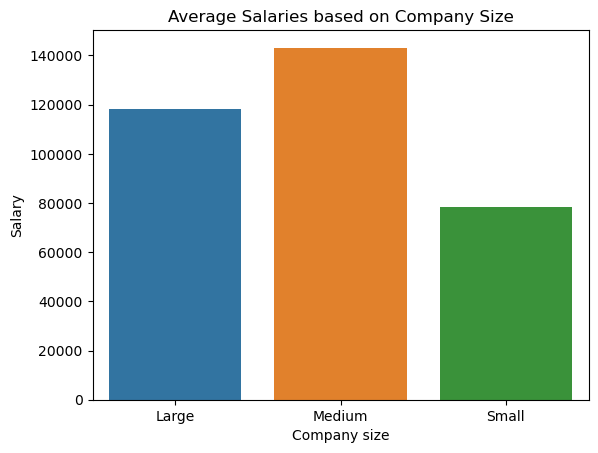

In [23]:
compsize_based_salary=np.array(df['salary_in_usd'].groupby(df['company_size']) .mean())
compsize_based_title=['Large', 'Medium', 'Small']
plt.title("Average Salaries based on Company Size")
plt.xlabel('Company size')
plt.ylabel('Salary')
sns.barplot(x=compsize_based_title,y=compsize_based_salary)
plt.show()

**A medium sized company offers a better average salary instead of small and large companies**

### Salaries based on work years

In [24]:
df['salary_in_usd'].groupby(df['work_year']) .mean()

work_year
2020     92302.631579
2021     94087.208696
2022    133338.620793
2023    149045.541176
Name: salary_in_usd, dtype: float64

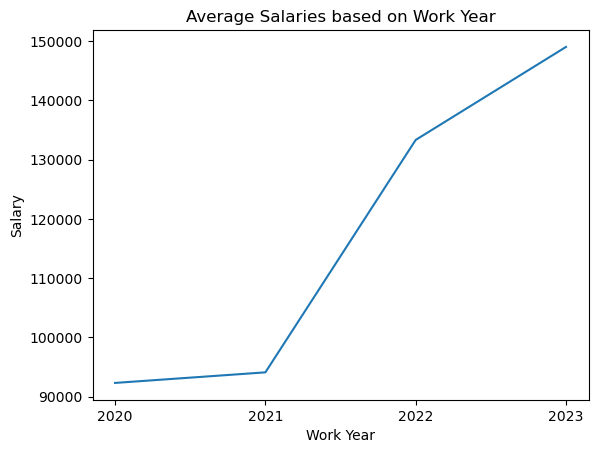

In [25]:
year_based_salary=np.array(df['salary_in_usd'].groupby(df['work_year']) .mean())
plt.title("Average Salaries based on Work Year")
plt.xlabel('Work Year')
plt.ylabel('Salary')
sns.lineplot(x=['2020', '2021', '2022','2023'],y=year_based_salary)
plt.show()

#### the salaries of data science fields goes on increasing with time as the amount of data generated by community is increasing rapidly

# No of Jobs based on other features

### No of jobs based on Experiance level

In [26]:
df['experience_level'].value_counts()

Senior level          2516
intermediate level     805
Entry level            320
Executive level        114
Name: experience_level, dtype: int64

**This shows that senior level/expert have the most numbers of jobs**

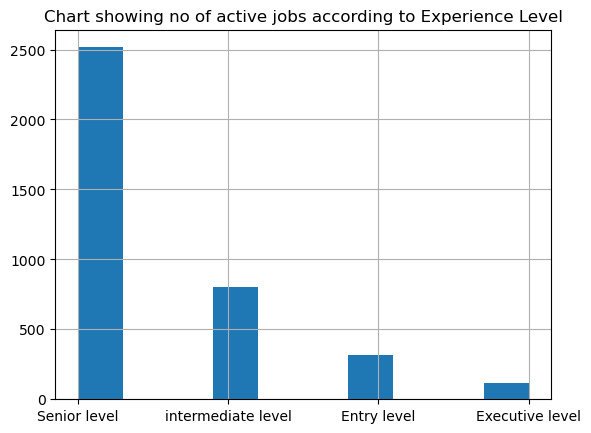

In [27]:
plt.title('Chart showing no of active jobs according to Experience Level')
df['experience_level'].hist()
plt.show()

**So senior level experience people likely to have more jobs**

### No of jobs based on Employment type

In [28]:
df['employment_type'].value_counts()

Full Time    3718
Part Time      17
Contract       10
Freelance      10
Name: employment_type, dtype: int64

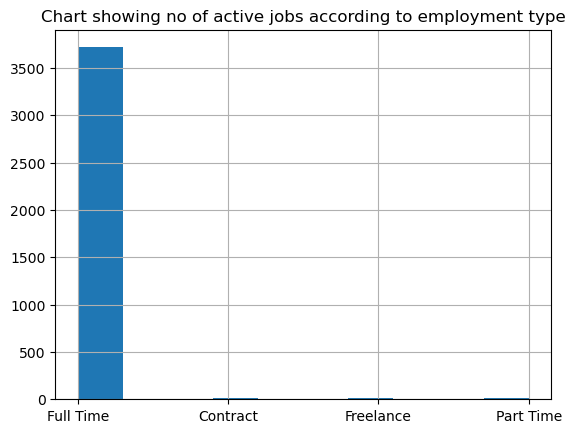

In [29]:
plt.title('Chart showing no of active jobs according to employment type')
df['employment_type'].hist()
plt.show()

### No of jobs based on Company Size

In [30]:
df['company_size'].value_counts()

M    3153
L     454
S     148
Name: company_size, dtype: int64

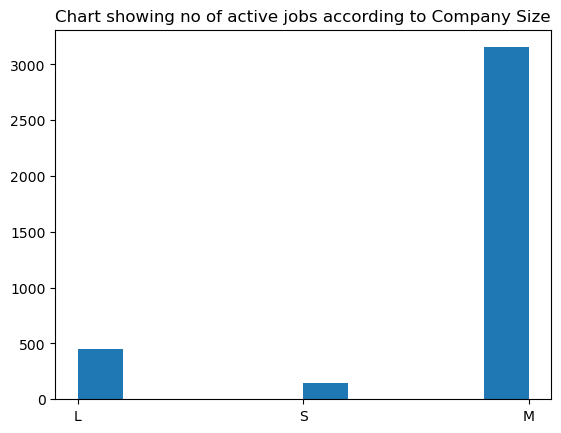

In [31]:
plt.title('Chart showing no of active jobs according to Company Size')
df['company_size'].hist(grid=False)
plt.show()

### No of jobs based on Company Location

In [32]:
df['company_location'].value_counts()

US    3040
GB     172
CA      87
ES      77
IN      58
      ... 
MK       1
BS       1
IR       1
CR       1
MT       1
Name: company_location, Length: 72, dtype: int64

### No of jobs based on Work Year

In [33]:
df['work_year'].value_counts()

2023    1785
2022    1664
2021     230
2020      76
Name: work_year, dtype: int64

In [34]:
work_year_count=list(df['work_year'].value_counts())
work_year_count.reverse()

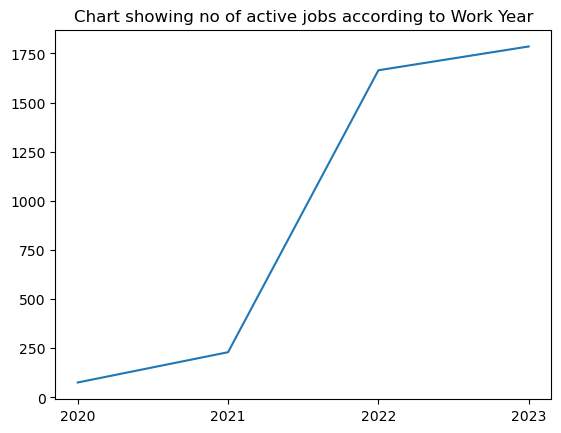

In [35]:
plt.title('Chart showing no of active jobs according to Work Year')
sns.lineplot(x=['2020', '2021', '2022','2023'],y=work_year_count)
plt.show()

#### No of jobs related to data science field goes on increasing with time to time

# A new approach

**Here we will further explore the data**

In [36]:
df.groupby(['experience_level','employment_type','work_year']).mean()

salary_in_usd  remote_ratio
experience_level   employment_type work_year                             
Entry level        Contract        2020       100000.000000    100.000000
                                   2022        30469.000000    100.000000
                   Freelance       2022        75000.000000    100.000000
                   Full Time       2020        59256.600000     67.500000
                                   2021        58755.060000     69.000000
                                   2022        77924.678261     59.565217
                                   2023        95946.401709     38.461538
                   Part Time       2020        18817.500000     75.000000
                                   2021        16407.200000     70.000000
                                   2022        67823.333333     83.333333
                                   2023        17779.000000    100.000000
Executive level    Contract        2021       416000.000000    100.000000
                   Full Time       2020       139944.333333     50.000000
                                   2021       160586.666667     55.555556
                                   2022       188260.292683     71.951220
                                   2023       203705.683333     30.000000
Senior level       Contract        2021       105000.000000    100.000000
                                   2022        90000.000000    100.000000
                   Freelance       2020        60000.000000    100.000000
                                   2023        50000.000000     50.000000
                   Full Time       2020       141784.058824     64.705882
                                   2021       126378.208333     72.222222
                                   2022       147710.400176     54.749340
                                   2023       159739.463813     34.591440
intermediate level Contract        2021       270000.000000    100.000000
                                   2022        33750.000000     75.000000
                                   2023        27750.000000    100.000000
                   Freelance       2021        25851.666667     33.333333
                                   2022        65261.500000    100.000000
                   Full Time       2020        87564.718750     62.500000
                                   2021        82930.848837     66.860465
                                   2022       102024.620787     52.949438
                                   2023       116854.500000     30.345912
                   Part Time       2021        37575.000000     75.000000
                                   2022        52533.000000     50.000000

### if you see in the above table we can conclude a few observations:
#### For Entry Level:
**if a person is at its entry level job and he is working as a full time employee then he will get an average salary of 80496.529801 dollars**

**if a person is at its entry level job and he is working as a Part time employee then he will get an average salary of 38885.000000 dollars**

**if a person is at its entry level job and he is working as a Freelance employee then he will get an average salary of 75000 dollars**

**if a person is at its entry level job and he is working as a Contract employee then he will get an average salary of 65230.529801 dollars**








#### For  Executive Level:
**if a person is at its Executive level job and he is working as a Contract employee then he will get an average salary of 416000.529801 dollars**

**if a person is at its Executive level job and he is working as a Full time employee then he will get an average salary of 193000.000000 dollars**

#### For Senior Level:
**if a person is at its Senior level job and he is working as a full time employee then he will get an average salary of 153000.529801 dollars**

**if a person is at its Senior level job and he is working as a Freelance employee then he will get an average salary of 53333 dollars**

**if a person is at its Senior level job and he is working as a Contract employee then he will get an average salary of 97500.529801 dollars**

#### For Intermediate Level:
**if a person is at its Intermediate level job and he is working as a full time employee then he will get an average salary of 105321.529801 dollars**

**if a person is at its Intermediate level job and he is working as a Part time employee then he will get an average salary of 42561.000000 dollars**

**if a person is at its Intermediate level job and he is working as a Freelance employee then he will get an average salary of 41600 dollars**

**if a person is at its Intermediate level job and he is working as a Contract employee then he will get an average salary of 78600.529801 dollars**

### Combining experiance, employment type and company size to check insights about salary

In [37]:
df.groupby(['experience_level','employment_type','company_size']).mean()

work_year  salary_in_usd  \
experience_level   employment_type company_size                               
Entry level        Contract        L             2020.000000  100000.000000   
                                   M             2022.000000   30469.000000   
                   Freelance       M             2022.000000  100000.000000   
                                   S             2022.000000   50000.000000   
                   Full Time       L             2021.863158   74901.189474   
                                   M             2022.400000   88396.309091   
                                   S             2021.380952   62117.809524   
                   Part Time       L             2022.000000   18517.000000   
                                   M             2021.500000   58088.500000   
                                   S             2021.000000   39661.333333   
Executive level    Contract        S             2021.000000  416000.000000   
                   Full Time       L             2021.230769  165363.153846   
                                   M             2022.589474  198857.284211   
                                   S             2021.800000  152992.600000   
Senior level       Contract        M             2021.500000   97500.000000   
                   Freelance       M             2023.000000   50000.000000   
                                   S             2021.500000   55000.000000   
                   Full Time       L             2021.961353  156159.690821   
                                   M             2022.533363  153738.751657   
                                   S             2021.512195  109405.975610   
intermediate level Contract        L             2021.000000  270000.000000   
                                   M             2022.000000    7500.000000   
                                   S             2022.666667   38500.000000   
                   Freelance       L             2021.000000   20000.000000   
                                   M             2021.333333   52518.333333   
                                   S             2022.000000   30523.000000   
                   Full Time       L             2021.492308   88707.030769   
                                   M             2022.415584  112215.428571   
                                   S             2021.521739   59956.565217   
                   Part Time       L             2021.500000   61137.000000   
                                   M             2021.000000    5409.000000   

                                                 remote_ratio  
experience_level   employment_type company_size                
Entry level        Contract        L               100.000000  
                                   M               100.000000  
                   Freelance       M               100.000000  
                                   S               100.000000  
                   Full Time       L                65.789474  
                                   M                41.818182  
                                   S                71.428571  
                   Part Time       L                87.500000  
                                   M                75.000000  
                                   S                75.000000  
Executive level    Contract        S               100.000000  
                   Full Time       L                50.000000  
                                   M                44.736842  
                                   S               100.000000  
Senior level       Contract        M               100.000000  
                   Freelance       M                50.000000  
                                   S                75.000000  
                   Full Time       L                52.173913  
                                   M                43.769333  
                                   S                76.829268  
intermediate level Contract        

### Salaries according to experience level and location of company

In [38]:
df.groupby(['experience_level','company_location']).mean()

work_year  salary_in_usd  remote_ratio
experience_level   company_location                                          
Entry level        AR                2022.000000   25000.000000    100.000000
                   AS                2021.333333   29351.000000     66.666667
                   AT                2022.000000   50000.000000     50.000000
                   AU                2022.000000   70866.500000     66.666667
                   BA                2023.000000  120000.000000     50.000000
...                                          ...            ...           ...
intermediate level SG                2022.250000   61770.000000     62.500000
                   SI                2022.333333   49409.333333     83.333333
                   TH                2023.000000   24740.000000     50.000000
                   TR                2021.500000   18779.750000     37.500000
                   US                2022.331992  127822.539235     40.744467

[138 rows x 3 columns]

**it will give all insights about salaries in different regions**

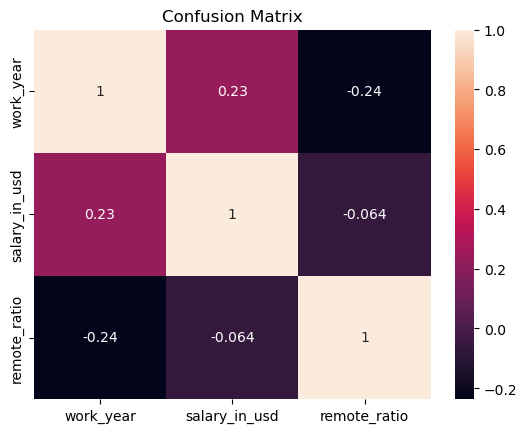

In [39]:
plt.title("Confusion Matrix")
sns.heatmap(df.corr(),annot=True)
plt.show()

#####  This Confusion Matrix shows that as year passes the salaries are increasing 🤩🤩

#### If you like this notebook then give it an upvote